<a href="https://colab.research.google.com/github/mansh7763/Chikitsa/blob/main/Medical_Chatbot_using_Llama3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install datasets

# analyze the dataset and write the instruction part accordingly

# Start creating final dataset

In [ ]:

# !pip install --upgrade pyarrow datasets

In [ ]:
from datasets import load_dataset

# Question answering dataset
dataset1 = load_dataset("avaliev/chat_doctor", split="train") # dataset1
dataframe1 = dataset1.to_pandas()

dataset2 = load_dataset("openlifescienceai/medmcqa", split='train') # dataset2 # remove some part fromoutput column
dataframe2 = dataset2.to_pandas()

dataset3 = load_dataset("lavita/medical-qa-datasets", "all-processed", split='train') # dataset3
dataframe3 = dataset3.to_pandas()

# dataset4 = load_dataset("dim/medical_qa_ru_data", split='train') # dataset4 # It is in Russian
# dataframe4 = dataset4.to_pandas()

dataset5 = load_dataset("wentechno/medicalQA-50thPlus", split='train') # dataset5
dataframe5 = dataset5.to_pandas()

# dataset6 = load_dataset("ZahrizhalAli/mental_health_conversational_dataset", split='train') # dataset6
# dataframe6 = dataset6.to_pandas()

#some local files
# dataframe7 = pd.read_excel('/content/MedInfo2019-QA-Medications.xlsx') # https://www.kaggle.com/datasets/moaaztameer/medqa-usmle #MCQ dataset

# dataframe8 = pd.read_json('/content/train.jsonl', lines=True) # https://github.com/abachaa/Medication_QA_MedInfo2019

# MCQ dataset


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/2.34k [00:00<?, ?B/s]

train.json:   0%|          | 0.00/120M [00:00<?, ?B/s]

validation.json:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

test.json:   0%|          | 0.00/15.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/95588 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11949 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11949 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/85.9M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/936k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.48M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/182822 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6150 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/4183 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/16.4k [00:00<?, ?B/s]

(…)-00000-of-00001-a77e2814210655f1.parquet:   0%|          | 0.00/155M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/239357 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/165 [00:00<?, ?B/s]

combined_medical_qa_dataset.jsonl:   0%|          | 0.00/574M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/529264 [00:00<?, ? examples/s]

# DataFrame 1: preprocessing
* rename column input->Input, instruction->Instruction and output->Output

In [ ]:
dataframe1.head() # this dataset is in good conditions

,input,instruction,output
0,Hi. My son had an appendectomy within the pas...,"If you are a doctor, please answer the medical...","Hello dear, Thank you for your contact to Chat..."
1,hello...i have a severe gambling addiction tha...,"If you are a doctor, please answer the medical...",Degree understand your concerns went through y...
2,I am a female age 50 my left knee has been hur...,"If you are a doctor, please answer the medical...",Dear patient you. May be having early osteoart...
3,"Hello doctor,My son is 10 years old. Since one...","If you are a doctor, please answer the medical...","Hello, Welcome to Chat Doctor forum. I underst..."
4,"Im 13 years old, my chest hurts sometimes, fro...","If you are a doctor, please answer the medical...",Thanks for your question on Chat Doctor. I can...


In [ ]:

dataframe1.rename({'input':'Input', 'output':'Output', 'instruction':'Instruction'}, axis=1, inplace=True)
dataframe1.head()

,Input,Instruction,Output
0,Hi. My son had an appendectomy within the pas...,"If you are a doctor, please answer the medical...","Hello dear, Thank you for your contact to Chat..."
1,hello...i have a severe gambling addiction tha...,"If you are a doctor, please answer the medical...",Degree understand your concerns went through y...
2,I am a female age 50 my left knee has been hur...,"If you are a doctor, please answer the medical...",Dear patient you. May be having early osteoart...
3,"Hello doctor,My son is 10 years old. Since one...","If you are a doctor, please answer the medical...","Hello, Welcome to Chat Doctor forum. I underst..."
4,"Im 13 years old, my chest hurts sometimes, fro...","If you are a doctor, please answer the medical...",Thanks for your question on Chat Doctor. I can...


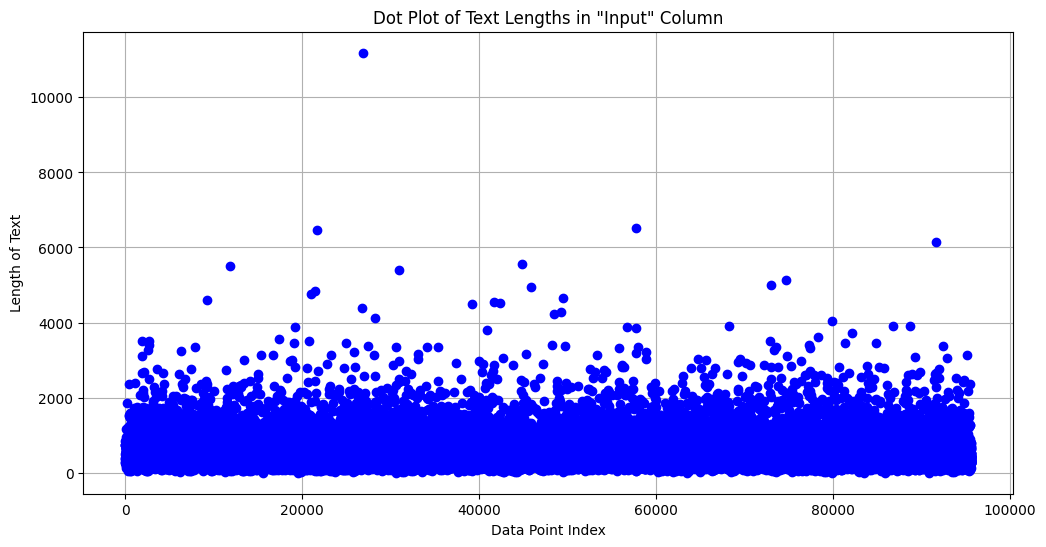

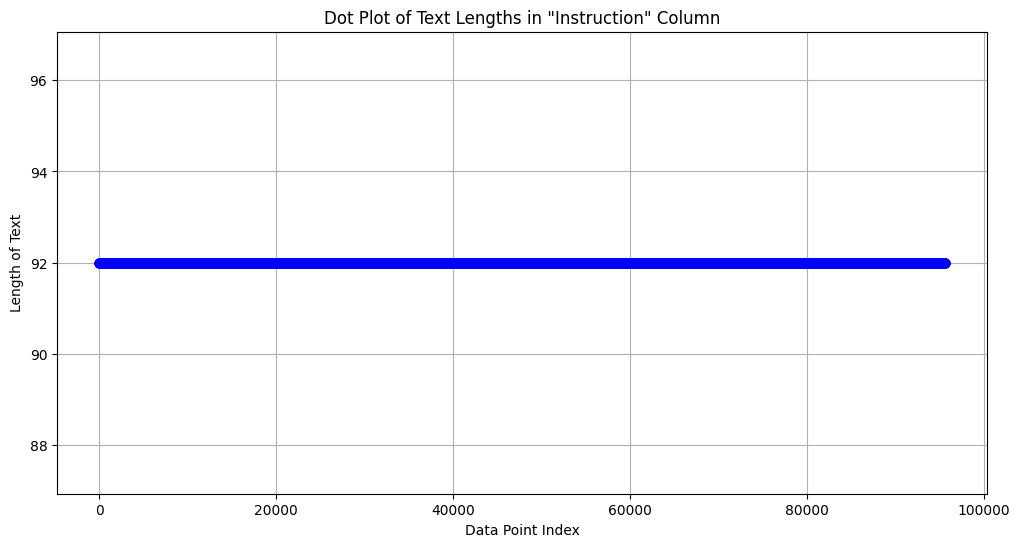

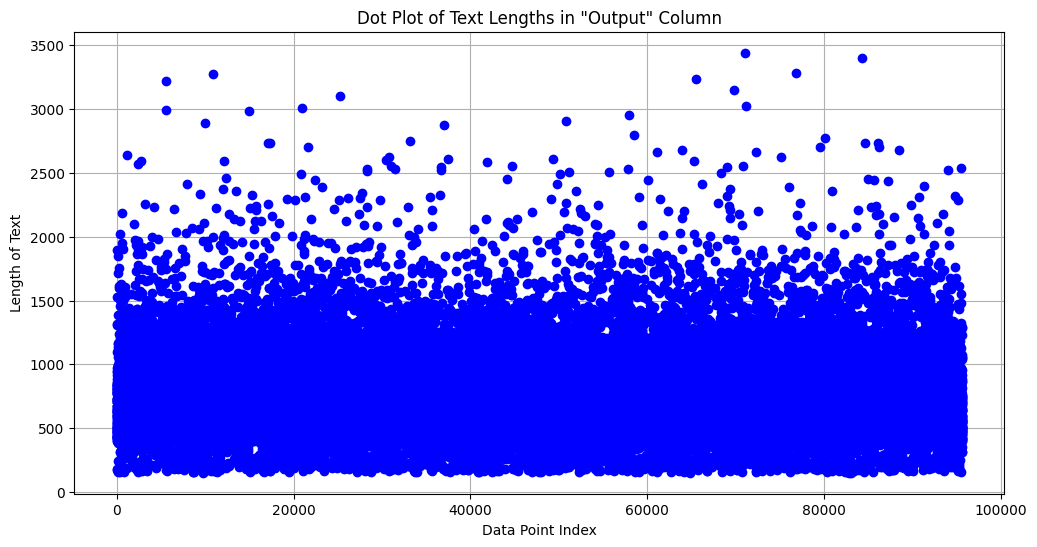

In [ ]:

# Function to plot dot plot for text length in each column
def plot_dotplot(df):
    for col in df.columns:
        if df[col].dtype == 'object':  # Check if the column is of string type
            # Calculate the length of each entry
            lengths = df[col].apply(lambda x: len(str(x)) if pd.notna(x) else 0)

            # Plotting
            plt.figure(figsize=(12, 6))
            plt.plot(lengths, 'o', color='blue')
            plt.title(f'Dot Plot of Text Lengths in "{col}" Column')
            plt.xlabel('Data Point Index')
            plt.ylabel('Length of Text')
            plt.grid(True)
            plt.show()

# Call the function
plot_dotplot(dataframe1)


# DataFrame 2 : preprocessing
* drop the column 'id', 'cop', 'choice_type', 'subject_name', 'topic_name'

* i have to merge options with input data i.e input. These are the options (a).. (b).. (c).. (d).. . choose correct option and explain
add_text = "\n These are the options (a). {} (b). {} (c). {} (d). {} . Choose the correct option, it might be one or more than one. Explain your answer."

* Drop the column 'opa', 'opb', 'opc', 'opd' and also replace the name of column Input, Output

* Add another column named Instruction. in this column each datapoint is same which is: You are a doctor, please answer the medical questions based on the patient's description.


In [ ]:
dataframe2.head()

,id,question,opa,opb,opc,opd,cop,choice_type,exp,subject_name,topic_name
0,e9ad821a-c438-4965-9f77-760819dfa155,Chronic urethral obstruction due to benign pri...,Hyperplasia,Hyperophy,Atrophy,Dyplasia,2,single,Chronic urethral obstruction because of urinar...,Anatomy,Urinary tract
1,e3d3c4e1-4fb2-45e7-9f88-247cc8f373b3,Which vitamin is supplied from only animal sou...,Vitamin C,Vitamin B7,Vitamin B12,Vitamin D,2,single,Ans. (c) Vitamin B12 Ref: Harrison's 19th ed. ...,Biochemistry,Vitamins and Minerals
2,5c38bea6-787a-44a9-b2df-88f4218ab914,All of the following are surgical options for ...,Adjustable gastric banding,Biliopancreatic diversion,Duodenal Switch,Roux en Y Duodenal By pass,3,multi,"Ans. is 'd' i.e., Roux en Y Duodenal Bypass Ba...",Surgery,Surgical Treatment Obesity
3,cdeedb04-fbe9-432c-937c-d53ac24475de,Following endaerectomy on the right common car...,Central aery of the retina,Infraorbital aery,Lacrimal aery,Nasociliary aretry,0,multi,The central aery of the retina is a branch of ...,Ophthalmology,None
4,dc6794a3-b108-47c5-8b1b-3b4931577249,Growth hormone has its effect on growth through?,Directly,IG1-1,Thyroxine,Intranuclear receptors,1,single,"Ans. is 'b' i.e., IGI-1GH has two major functi...",Physiology,None


In [ ]:
#drop the column 'id', 'cop', 'choice_type', 'subject_name', 'topic_name'
dataframe2.drop({'id', 'cop', 'choice_type', 'subject_name', 'topic_name'}, axis=1, inplace=True)

# i have to merge options with input data i.e input. These are the options (a).. (b).. (c).. (d).. . choose correct option and explain
add_text = "\n These are the options (a). {} (b). {} (c). {} (d). {} . Choose the correct option, it might be one or more than one. Explain your answer."

# Use vectorized operation to combine and append the options to the questions
dataframe2['question'] = dataframe2.apply(
    lambda row: row['question'] + add_text.format(row['opa'], row['opb'], row['opc'], row['opd']),
    axis=1
)

# Drop the column 'opa', 'opb', 'opc', 'opd' and also replace the name of column Input, Output
dataframe2.drop(['opa', 'opb', 'opc', 'opd'], axis=1, inplace=True)
dataframe2.rename(columns={'question': 'Input', 'exp': 'Output'}, inplace=True)

# Add another column named Instruction. in this column each datapoint is same which is: You are a doctor, please answer the medical questions based on the patient's description.
dataframe2['Instruction'] = "You are a doctor, please answer the medical questions based on the patient's description."

dataframe2.head()


,Input,Output,Instruction
0,Chronic urethral obstruction due to benign pri...,Chronic urethral obstruction because of urinar...,"You are a doctor, please answer the medical qu..."
1,Which vitamin is supplied from only animal sou...,Ans. (c) Vitamin B12 Ref: Harrison's 19th ed. ...,"You are a doctor, please answer the medical qu..."
2,All of the following are surgical options for ...,"Ans. is 'd' i.e., Roux en Y Duodenal Bypass Ba...","You are a doctor, please answer the medical qu..."
3,Following endaerectomy on the right common car...,The central aery of the retina is a branch of ...,"You are a doctor, please answer the medical qu..."
4,Growth hormone has its effect on growth throug...,"Ans. is 'b' i.e., IGI-1GH has two major functi...","You are a doctor, please answer the medical qu..."


# DataFrame3 : Preprocessing
* Drop this column '__index_level_0__' and rename column input->Input, instruction->Instruction and output->Output

In [ ]:
dataframe3.head()

,instruction,input,output,__index_level_0__
0,"If you are a doctor, please answer the medical...",hi. im a home health aide and i have a client ...,"hi, thanks for contacting chatbot. swelling in...",137213
1,Please summerize the given abstract to a title,RATIONALE: The COVID-19 pandemic struck an imm...,Hydroxychloroquine vs. Azithromycin for Hospit...,67540
2,Please summerize the given abstract to a title,Objectives: To investigate the experience of p...,Playing the harmonica with chronic obstructive...,109854
3,"If you are a doctor, please answer the medical...","Hi, Im sorry to bother you but I have fpund a ...",welcome to chatbot .1. the history suggest a p...,137309
4,"If you are a doctor, please answer the medical...","Hi, my penis has a slightly lighter spot at t...","hello, skin color changes, discoloration etc. ...",135382


In [ ]:
dataframe3.drop({'__index_level_0__'}, axis=1, inplace=True)

In [ ]:
dataframe3.rename({'input':'Input', 'output':'Output', 'instruction':'Instruction'}, axis=1, inplace=True)
dataframe3.head()

,Instruction,Input,Output
0,"If you are a doctor, please answer the medical...",hi. im a home health aide and i have a client ...,"hi, thanks for contacting chatbot. swelling in..."
1,Please summerize the given abstract to a title,RATIONALE: The COVID-19 pandemic struck an imm...,Hydroxychloroquine vs. Azithromycin for Hospit...
2,Please summerize the given abstract to a title,Objectives: To investigate the experience of p...,Playing the harmonica with chronic obstructive...
3,"If you are a doctor, please answer the medical...","Hi, Im sorry to bother you but I have fpund a ...",welcome to chatbot .1. the history suggest a p...
4,"If you are a doctor, please answer the medical...","Hi, my penis has a slightly lighter spot at t...","hello, skin color changes, discoloration etc. ..."


# DataFrame 4: preprocessing
* it is in russian. so we decided to leave it for this time.

In [ ]:
# dataframe4.head()

In [ ]:
# #Drop the 'date', 'categ', 'theme', 'spec10'
# dataframe4.drop({'date', 'categ', 'theme', 'spec10'}, axis=1, inplace=True)
# #rename the desc and ans column
# dataframe4.rename({'desc':'Input', 'ans':'Output'}, axis=1, inplace=True)
# #add another column 'Instruction'
# dataframe4['Instruction'] = "You are a doctor, please answer the medical questions based on the patient's description."
# dataframe4.head()

In [ ]:
# dataframe4.to_excel('dataframe4.xlsx', index=False)
# # after this we have loaded the dataset from local
# # There was some problem with translate here

# DataFrame 5:preprocessing

In [ ]:
dataframe5.head()

,input,output
0,The life-course concept has been widely used d...,Developmental Origins of Health and Disease: T...
1,A boundary optimal control problem arising in ...,Boundary optimal control of time–space SIR mod...
2,Thank you. Heres my question or concern. I had...,"hi, i am sorry to hear you are having these is..."
3,Which laboratory tests are used to identify ca...,Some patients with cardiac tumors may have ane...
4,We recommend selective use of CT instead.,This is a directly correlative relationship


In [ ]:
dataframe5.rename({'input':'Input', 'output':'Output'}, axis=1, inplace=True)
dataframe5['Instruction'] = "You are a doctor, please answer the medical questions based on the patient's description."
dataframe5.head()

,Input,Output,Instruction
0,The life-course concept has been widely used d...,Developmental Origins of Health and Disease: T...,"You are a doctor, please answer the medical qu..."
1,A boundary optimal control problem arising in ...,Boundary optimal control of time–space SIR mod...,"You are a doctor, please answer the medical qu..."
2,Thank you. Heres my question or concern. I had...,"hi, i am sorry to hear you are having these is...","You are a doctor, please answer the medical qu..."
3,Which laboratory tests are used to identify ca...,Some patients with cardiac tumors may have ane...,"You are a doctor, please answer the medical qu..."
4,We recommend selective use of CT instead.,This is a directly correlative relationship,"You are a doctor, please answer the medical qu..."


# Dataframe6: preprocessing
* split the dialogue into human and assistant parts
* raname input, output and add instruction
* drop text column

In [ ]:
# dataframe6.head()

In [ ]:
# # Function to split the dialogue into human and assistant parts
# def split_dialogue(row):
#     # Splitting the data into <HUMAN> and <ASSISTANT> parts
#     split_data = row.split('<HUMAN>:')[1].strip().split('<ASSISTANT>:')

#     # Extracting the <HUMAN> and <ASSISTANT> parts
#     human_part = split_data[0].strip()
#     assistant_part = split_data[1].strip()

#     return pd.Series([human_part, assistant_part])

# # Apply the function to the entire DataFrame
# dataframe6[['Input', 'Output']] = dataframe6['text'].apply(split_dialogue)

# #Add new column instruction
# dataframe6['Instruction'] = "You are a doctor, please answer the medical questions based on the patient's description."

# # Drop the original dialogue column if not needed
# dataframe6 = dataframe6.drop(columns=['text'])

# dataframe6.head()

# Dataframe7: preprocessing

In [ ]:
# dataframe7.head()

In [ ]:
# dataframe7.columns

In [ ]:
# dataframe7.drop({'Focus (Drug)', 'Question Type', 'Section Title', 'URL'}, axis=1, inplace=True)
# dataframe7.rename({'Question':'Input', 'Answer':'Output'}, axis=1, inplace=True)
# dataframe7['Instruction'] = "You are a doctor, please answer the medical questions based on the patient's description."
# dataframe7.head()

# Dataframe8: preprocessing

In [ ]:
# dataframe8.head()

In [ ]:
# # i have to merge options with input data i.e input. These are the options (a).. (b).. (c).. (d).. . choose correct option and explain
# add_input_text = "\n These are the options (a). {} (b). {} (c). {} (d). {} . Tell me the correct option"
# add_ouput_text = "Option {} is correct in all what you mentioned. Which is "

# # Use vectorized operation to combine and append the options to the questions
# dataframe8['question'] = dataframe8.apply(
#     lambda row: row['question'] + add_input_text.format(row['options']['A'], row['options']['B'], row['options']['C'], row['options']['D']),
#     axis=1
# )

# # add option number also in output
# dataframe8['answer'] = dataframe8.apply(
#     lambda row: add_ouput_text.format(row['answer_idx']) + row['answer'],
#     axis=1
# )

# #Drop columns 'option', 'meta_info', 'answer_idx'
# dataframe8.drop({'options', 'meta_info', 'answer_idx'}, axis=1, inplace=True)

# #update name of the column
# dataframe8.rename({'question':'Input', 'answer':'Output'}, axis=1, inplace=True)

# #add the instruction column
# dataframe8['Instruction'] = "You are a doctor, please answer the medical questions based on the patient's description."

# dataframe8.head()

In [ ]:
med_dataframe = pd.concat([dataframe1,dataframe2,dataframe3,dataframe5], axis=0, ignore_index=True) #dataframe4 not included
med_dataframe.head()

,Input,Instruction,Output
0,Hi. My son had an appendectomy within the pas...,"If you are a doctor, please answer the medical...","Hello dear, Thank you for your contact to Chat..."
1,hello...i have a severe gambling addiction tha...,"If you are a doctor, please answer the medical...",Degree understand your concerns went through y...
2,I am a female age 50 my left knee has been hur...,"If you are a doctor, please answer the medical...",Dear patient you. May be having early osteoart...
3,"Hello doctor,My son is 10 years old. Since one...","If you are a doctor, please answer the medical...","Hello, Welcome to Chat Doctor forum. I underst..."
4,"Im 13 years old, my chest hurts sometimes, fro...","If you are a doctor, please answer the medical...",Thanks for your question on Chat Doctor. I can...


In [ ]:
med_dataframe.shape

(1047031, 3)

# Now add the general conversation chatbot dataset

In [ ]:
dataset = load_dataset('xzuyn/lima-multiturn-alpaca', split='train')
dataframe9 = dataset.to_pandas()

README.md:   0%|          | 0.00/189 [00:00<?, ?B/s]

lima-multiturn-alpaca.json:   0%|          | 0.00/2.99M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1030 [00:00<?, ? examples/s]

In [ ]:
dataframe9.head()

,output,input,instruction
0,The question is relatively broad and one shoul...,,Can brain cells move? By movement I mean long ...
1,There is a general historical trend.\nIn the o...,,In our computer systems lecture we were introd...
2,"Sure, please take a look at csvkit. It provide...",,View tabular file such as CSV from command lin...
3,I'll answer this question from the theoretical...,,Slater type orbitals (STO) are considered to b...
4,Remember that in ```git``` you have:\n\n* the ...,,"Explain what ""git reset"" does. I come from a S..."


In [ ]:
dataframe9.rename({'instruction':'Input', 'output':'Output'}, axis=1, inplace=True)
dataframe9.drop({'input'}, axis=1, inplace=True)
dataframe9['Instruction'] = "You are a doctor, please answer the medical questions based on the patient's description."
dataframe9.head()

,Output,Input,Instruction
0,The question is relatively broad and one shoul...,Can brain cells move? By movement I mean long ...,"You are a doctor, please answer the medical qu..."
1,There is a general historical trend.\nIn the o...,In our computer systems lecture we were introd...,"You are a doctor, please answer the medical qu..."
2,"Sure, please take a look at csvkit. It provide...",View tabular file such as CSV from command lin...,"You are a doctor, please answer the medical qu..."
3,I'll answer this question from the theoretical...,Slater type orbitals (STO) are considered to b...,"You are a doctor, please answer the medical qu..."
4,Remember that in ```git``` you have:\n\n* the ...,"Explain what ""git reset"" does. I come from a S...","You are a doctor, please answer the medical qu..."


## Now, we should also add some general dataset for good functioning of the model

In [ ]:
from datasets import load_dataset
dataset = load_dataset('sirsam01/lima-multiturn-sharegpt', split='train')
dataframe10 = dataset.to_pandas()
dataframe10.head()

README.md:   0%|          | 0.00/252 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


lima_multiturn.json:   0%|          | 0.00/3.16M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1030 [00:00<?, ? examples/s]

,conversation
0,"[{'from': 'human', 'value': 'Can brain cells m..."
1,"[{'from': 'human', 'value': 'In our computer s..."
2,"[{'from': 'human', 'value': 'View tabular file..."
3,"[{'from': 'human', 'value': 'Slater type orbit..."
4,"[{'from': 'human', 'value': 'Explain what ""git..."


In [ ]:
# Define a function to extract 'human' and 'gpt' values
def extract_conversation(conversation):
    input_text = ""
    output_text = ""

    for entry in conversation:
        if entry['from'] == 'human':
            input_text = entry['value']
        elif entry['from'] == 'gpt':
            output_text = entry['value']

    return pd.Series([input_text, output_text], index=['Input', 'Output'])

# Apply the function to each row in the dataframe
dataframe10[['Input', 'Output']] = dataframe10['conversation'].apply(extract_conversation)

# Drop the original 'conversation' column
dataframe10.drop(columns=['conversation'], inplace=True)

# Add the 'Instruction' column
dataframe10['Instruction'] = "You are a doctor, please answer the medical questions based on the patient's description."

dataframe10.head()


,Input,Output,Instruction
0,Can brain cells move? By movement I mean long ...,The question is relatively broad and one shoul...,"You are a doctor, please answer the medical qu..."
1,In our computer systems lecture we were introd...,There is a general historical trend.\nIn the o...,"You are a doctor, please answer the medical qu..."
2,View tabular file such as CSV from command lin...,"Sure, please take a look at csvkit. It provide...","You are a doctor, please answer the medical qu..."
3,Slater type orbitals (STO) are considered to b...,I'll answer this question from the theoretical...,"You are a doctor, please answer the medical qu..."
4,"Explain what ""git reset"" does. I come from a S...",Remember that in ```git``` you have:\n\n* the ...,"You are a doctor, please answer the medical qu..."


In [ ]:
gen_QA_dataframe = pd.concat([dataframe9, dataframe10], axis=0, ignore_index=True)
gen_QA_dataframe.head()

,Output,Input,Instruction
0,The question is relatively broad and one shoul...,Can brain cells move? By movement I mean long ...,"You are a doctor, please answer the medical qu..."
1,There is a general historical trend.\nIn the o...,In our computer systems lecture we were introd...,"You are a doctor, please answer the medical qu..."
2,"Sure, please take a look at csvkit. It provide...",View tabular file such as CSV from command lin...,"You are a doctor, please answer the medical qu..."
3,I'll answer this question from the theoretical...,Slater type orbitals (STO) are considered to b...,"You are a doctor, please answer the medical qu..."
4,Remember that in ```git``` you have:\n\n* the ...,"Explain what ""git reset"" does. I come from a S...","You are a doctor, please answer the medical qu..."


In [ ]:
gen_QA_dataframe.shape

(2060, 3)

In [ ]:
print(dataframe9.shape)
print(dataframe10.shape)

(1030, 3)
(1030, 3)


## Final Dataframe for finetuning the model

In [ ]:
final_dataframe = pd.concat([med_dataframe, gen_QA_dataframe], axis=0, ignore_index=True)
final_dataframe.head()

,Input,Instruction,Output
0,Hi. My son had an appendectomy within the pas...,"If you are a doctor, please answer the medical...","Hello dear, Thank you for your contact to Chat..."
1,hello...i have a severe gambling addiction tha...,"If you are a doctor, please answer the medical...",Degree understand your concerns went through y...
2,I am a female age 50 my left knee has been hur...,"If you are a doctor, please answer the medical...",Dear patient you. May be having early osteoart...
3,"Hello doctor,My son is 10 years old. Since one...","If you are a doctor, please answer the medical...","Hello, Welcome to Chat Doctor forum. I underst..."
4,"Im 13 years old, my chest hurts sometimes, fro...","If you are a doctor, please answer the medical...",Thanks for your question on Chat Doctor. I can...


In [ ]:
final_dataframe.shape

(1049091, 3)

In [ ]:
%%capture
# Installs Unsloth, Xformers (Flash Attention) and all other packages!
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"

# We have to check which Torch version for Xformers (2.3 -> 0.0.27)
from torch import __version__; from packaging.version import Version as V
xformers = "xformers==0.0.27" if V(__version__) < V("2.4.0") else "xformers"
!pip install --no-deps {xformers} trl peft accelerate bitsandbytes trito

In [ ]:
!pip install bitsandbytes

  Using cached bitsandbytes-0.44.0-py3-none-manylinux_2_24_x86_64.whl.metadata (3.5 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 7.3 MB/s eta 0:00:00


In [ ]:
!pip install triton

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 6.3 MB/s eta 0:00:00


In [ ]:
!pip install xformers

  Using cached xformers-0.0.28.post1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata (1.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 67.1 MB/s eta 0:00:00


In [ ]:
!pip install trl

  Using cached trl-0.11.0-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 3.2 MB/s eta 0:00:00


In [ ]:
!pip install peft

  Using cached peft-0.12.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 5.5 MB/s eta 0:00:00


In [ ]:
from unsloth import FastLanguageModel
import torch
max_seq_length = 2048 # Choose any! We auto support RoPE Scaling internally!
dtype = None # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
load_in_4bit = True # Use 4bit quantization to reduce memory usage. Can be False.

# 4bit pre quantized models we support for 4x faster downloading + no OOMs.
fourbit_models = [
    "unsloth/mistral-7b-v0.3-bnb-4bit",      # New Mistral v3 2x faster!
    "unsloth/mistral-7b-instruct-v0.3-bnb-4bit",
    "unsloth/llama-3-8b-bnb-4bit",           # Llama-3 15 trillion tokens model 2x faster!
    "unsloth/llama-3-8b-Instruct-bnb-4bit",
    "unsloth/llama-3-70b-bnb-4bit",
    "unsloth/Phi-3-mini-4k-instruct",        # Phi-3 2x faster!
    "unsloth/Phi-3-medium-4k-instruct",
    "unsloth/mistral-7b-bnb-4bit",
    "unsloth/gemma-7b-bnb-4bit",             # Gemma 2.2x faster!
] # More models at https://huggingface.co/unsloth

model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/llama-3-8b-Instruct-bnb-4bit",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
    # token = "hf_...", # use one if using gated models like meta-llama/Llama-2-7b-hf
)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
==((====))==  Unsloth 2024.9.post2: Fast Llama patching. Transformers = 4.44.2.
   \\   /|    GPU: Tesla T4. Max memory: 14.748 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.4.1+cu121. CUDA = 7.5. CUDA Toolkit = 12.1.
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.28.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/220 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

In [ ]:
model = FastLanguageModel.get_peft_model(
    model,
    r = 16, # Choose any number > 0 ! Suggested 8, 16, 32, 64, 128
    target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
                      "gate_proj", "up_proj", "down_proj",],
    lora_alpha = 16,
    lora_dropout = 0, # Supports any, but = 0 is optimized
    bias = "none",    # Supports any, but = "none" is optimized
    # [NEW] "unsloth" uses 30% less VRAM, fits 2x larger batch sizes!
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for very long context
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
)

Unsloth 2024.9.post2 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [ ]:
from datasets import Dataset
import pandas as pd

In [ ]:
dataset = Dataset.from_pandas(final_dataframe)

In [ ]:
print(dataset.column_names)

['Input', 'Instruction', 'Output']


In [ ]:
alpaca_prompt = """Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.

### Instruction:
{}

### Input:
{}

### Response:
{}"""

EOS_TOKEN = tokenizer.eos_token # Must add EOS_TOKEN
def formatting_prompts_func(examples):
    Instructions = examples["Instruction"]
    Inputs       = examples["Input"]
    Outputs      = examples["Output"]
    texts = []
    for Instruction, Input, Output in zip(Instructions, Inputs, Outputs):
        # Must add EOS_TOKEN, otherwise your generation will go on forever!
        text = alpaca_prompt.format(Instruction, Input, Output) + EOS_TOKEN
        texts.append(text)
    return { "text" : texts, }
pass

from datasets import load_dataset
# dataset = load_dataset("yahma/alpaca-cleaned", split = "train")
dataset = dataset.map(formatting_prompts_func, batched = True,)

Map:   0%|          | 0/1049091 [00:00<?, ? examples/s]

In [ ]:
from trl import SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = dataset,
    dataset_text_field = "text",
    max_seq_length = max_seq_length,
    dataset_num_proc = 1,
    packing = False, # Can make training 5x faster for short sequences.
    args = TrainingArguments(
        per_device_train_batch_size = 1,
        gradient_accumulation_steps = 4,
        warmup_steps = 100,
        num_train_epochs = 10, # Set this for 1 full training run.
        max_steps = 100,
        # num_proc=1,
        learning_rate = 1e-5,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
    ),
)

Map:   0%|          | 0/1049091 [00:00<?, ? examples/s]

max_steps is given, it will override any value given in num_train_epochs


In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 1,049,091 | Num Epochs = 1
O^O/ \_/ \    Batch size per device = 1 | Gradient Accumulation steps = 4
\        /    Total batch size = 4 | Total steps = 100
 "-____-"     Number of trainable parameters = 41,943,040


Step,Training Loss
1,3.296600
2,3.156800
3,3.549700
4,2.765100
5,3.069000
6,3.204000
7,2.928100
8,2.900600
9,3.056700
10,3.206400


In [ ]:
# alpaca_prompt = Copied from above
FastLanguageModel.for_inference(model) # Enable native 2x faster inference
inputs = tokenizer(
[
    alpaca_prompt.format(
        "If you are a doctor, please answer the medical questions based on the patient's description.", # instruction
        "Hello Doctor! I had five stent put into my heart eight months ago. Now, every time they do an ECG, the T-wave is inverted. I do suffer a bit form short breath and a tight chest from time to time. Could you tell me whether this is normal after the stents, eight months out? Thanks Pieter", # input
        "", # output - leave this blank for generation!
    )
], return_tensors = "pt").to("cuda")

outputs = model.generate(**inputs, max_new_tokens = 256, use_cache = True)
tokenizer.batch_decode(outputs)

# You can either save the model in 16 bit or 4 bit Quantized model

## 16 bit model

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

# use this token: HUGGINGFACE_TOKEN

In [ ]:
from huggingface_hub import HfApi

api = HfApi()
api.create_repo(repo_id="abhiyanta/chatDoctor", exist_ok=True)

In [ ]:
# Merge to 16bit
model.save_pretrained_merged("model", tokenizer, save_method = "merged_16bit",)
model.push_to_hub_merged("abhiyanta/model(USERNAME/REPO)", tokenizer, save_method = "merged_16bit", token = "HUGGINGFACE_TOKEN")

# we can try with 4bit model, because 16bit model is not uploading after save model on local. session got crashed after loading one model chunk

In [ ]:
from huggingface_hub import notebook_login
notebook_login()

# use this token: HUGGINGFACE_TOKEN

In [ ]:
from huggingface_hub import HfApi

api = HfApi()
api.create_repo(repo_id="abhiyanta/chatDoctor", exist_ok=True)

RepoUrl('https://huggingface.co/abhiyanta/chatDoctor', endpoint='https://huggingface.co', repo_type='model', repo_id='abhiyanta/chatDoctor')

In [ ]:
# Merge to 4bit
model.save_pretrained_merged("model", tokenizer, save_method = "merged_4bit_forced",)
model.push_to_hub_merged("abhiyanta/chatDoctor", tokenizer, save_method = "merged_4bit_forced", token = "HUGGINGFACE_TOKEN")

NameError: name 'model' is not defined